# This Project is mainly about detecting types of glass found in crime scenes using machine learning.
### In this project, we begin with exploring and preprocessing the glass dataset to prepare it for machine learning classification. The following steps walk through data inspection, cleaning, and scaling before moving on to model building.

## Glass Composition Elements
- **Refractive Index**  
  Measures how much light bends when passing through the glass.  

- **Na** – Sodium  
  Commonly found in glass as sodium oxide (Na₂O), helps lower the melting point.  

- **Mg** – Magnesium  
  Improves the durability and chemical resistance of the glass.  

- **Al** – Aluminum  
  Enhances glass strength and resistance to weathering.  

- **Si** – Silicon  
  Main component of glass, present as silica (SiO₂), forming the glass structure.  

- **K** – Potassium  
  Used in some glass formulations to improve hardness and stability.  

- **Ca** – Calcium  
  Added as calcium oxide (CaO) to improve durability and reduce solubility in water.  

- **Ba** – Barium  
  Enhances optical properties, like brightness and refractive index.  

- **Fe** – Iron  
  Can give glass a green tint and affects light absorption properties.    


## Glass Types Description

The target variable `Type` represents the category of glass in the dataset. Below are the corresponding labels:

- **1**: Building Windows (Float)
- **2**: Building Windows (Non-Float)
- **3**: Vehicle Windows (Float)
- **5**: Containers
- **6**: Tableware
- **7**: Headlamps
---

# 1. Data Collection and Preprocessing

### 1.1 Importing Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

### 1.2 Loading the Dataset
The dataset is loaded from a CSV file without headers, so we will manually assign appropriate column names in the next step.

In [8]:
df = pd.read_csv('glass_data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### 1.3 Adding Missing Features(headers) Names
We created extra column 'Type_name' for more descriptive label for the target variable Type, which will help in Visualization.

In [10]:
df.columns = ["Id", "Refractive Index", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
types = {
    1: "Building Windows (Float)",
    2: "Building Windows (Non-Float)",
    3: "Vehicle Windows (Float)",
    5: "Containers",
    6: "Tableware",
    7: "Headlamps"
}
df['Type_name'] = df['Type'].map(types)
df.head()

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_name
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,Building Windows (Float)
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,Building Windows (Float)
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,Building Windows (Float)
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,Building Windows (Float)
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,Building Windows (Float)


### 1.4 Checking data types, dataset shape and if there is any missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                214 non-null    int64  
 1   Refractive Index  214 non-null    float64
 2   Na                214 non-null    float64
 3   Mg                214 non-null    float64
 4   Al                214 non-null    float64
 5   Si                214 non-null    float64
 6   K                 214 non-null    float64
 7   Ca                214 non-null    float64
 8   Ba                214 non-null    float64
 9   Fe                214 non-null    float64
 10  Type              214 non-null    int64  
 11  Type_name         214 non-null    object 
dtypes: float64(9), int64(2), object(1)
memory usage: 20.2+ KB


### 1.5 Statistical Information about the dataset
Descriptive statistics (mean, standard deviation, min/max, etc.) are shown to understand the data distribution for each feature.

In [14]:
df.describe()

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### 1.6 Check for null values

In [16]:
df.isnull().sum()

Id                  0
Refractive Index    0
Na                  0
Mg                  0
Al                  0
Si                  0
K                   0
Ca                  0
Ba                  0
Fe                  0
Type                0
Type_name           0
dtype: int64

### *1.7 Check for Duplicate Records*

In [18]:
df.drop_duplicates()

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_name
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,Building Windows (Float)
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,Building Windows (Float)
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,Building Windows (Float)
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,Building Windows (Float)
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,Building Windows (Float)
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,Headlamps
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,Headlamps
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,Headlamps
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,Headlamps


### 1.8 Finding Frequency of Glass Types
Here, we analyze how often each glass type appears in the dataset.

In [20]:
counts = df['Type'].value_counts()
percentages = df['Type'].value_counts(normalize=True) * 100

result = pd.DataFrame({'Count': counts, 'Percentage': percentages})
print(result)

      Count  Percentage
Type                   
2        76   35.514019
1        70   32.710280
7        29   13.551402
3        17    7.943925
5        13    6.074766
6         9    4.205607


### 1.9 Detecting Potential Outliers Using IQR

In [22]:
# First, select only numeric columns
numeric_df = df.select_dtypes(include='float')

# Calculate Q1, Q3, and IQR per column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Refractive Index    0.002635
Na                  0.917500
Mg                  1.485000
Al                  0.440000
Si                  0.807500
K                   0.487500
Ca                  0.932500
Ba                  0.000000
Fe                  0.100000
dtype: float64


In [23]:
# Now find outliers
outliers = numeric_df[((numeric_df < (Q1 - 5 * IQR)) | (numeric_df > (Q3 + 5 * IQR))).any(axis=1)]
print('Potential outliers in dataset: \n')
print(outliers)

Potential outliers in dataset: 

     Refractive Index     Na    Mg    Al     Si     K     Ca    Ba    Fe
32            1.51775  12.85  3.48  1.23  72.97  0.61   8.56  0.09  0.22
36            1.51909  13.89  3.53  1.32  71.81  0.51   8.78  0.11  0.00
61            1.51977  13.81  3.58  1.32  71.72  0.12   8.67  0.69  0.00
99            1.51811  12.96  2.96  1.43  72.92  0.60   8.79  0.14  0.00
100           1.51655  12.75  2.85  1.44  73.27  0.57   8.79  0.11  0.22
106           1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
107           1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24
110           1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00
111           1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00
112           1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00
128           1.52068  13.55  2.09  1.67  72.18  0.53   9.57  0.27  0.17
141           1.51851  13.20  3.63  1.07  72.83  0.57   8.41  0.09  0.17
142           1.51

### ^^ Most of These values aren't outliers since they are reasonable to be in the dataset given the range, even though they are considered as potential outliers from IQR method^^

### 1.10 To gain more insight, let's check Scatter & Box plots for visual inspection.
---

### Visualizing Feature Distributions with Boxplots

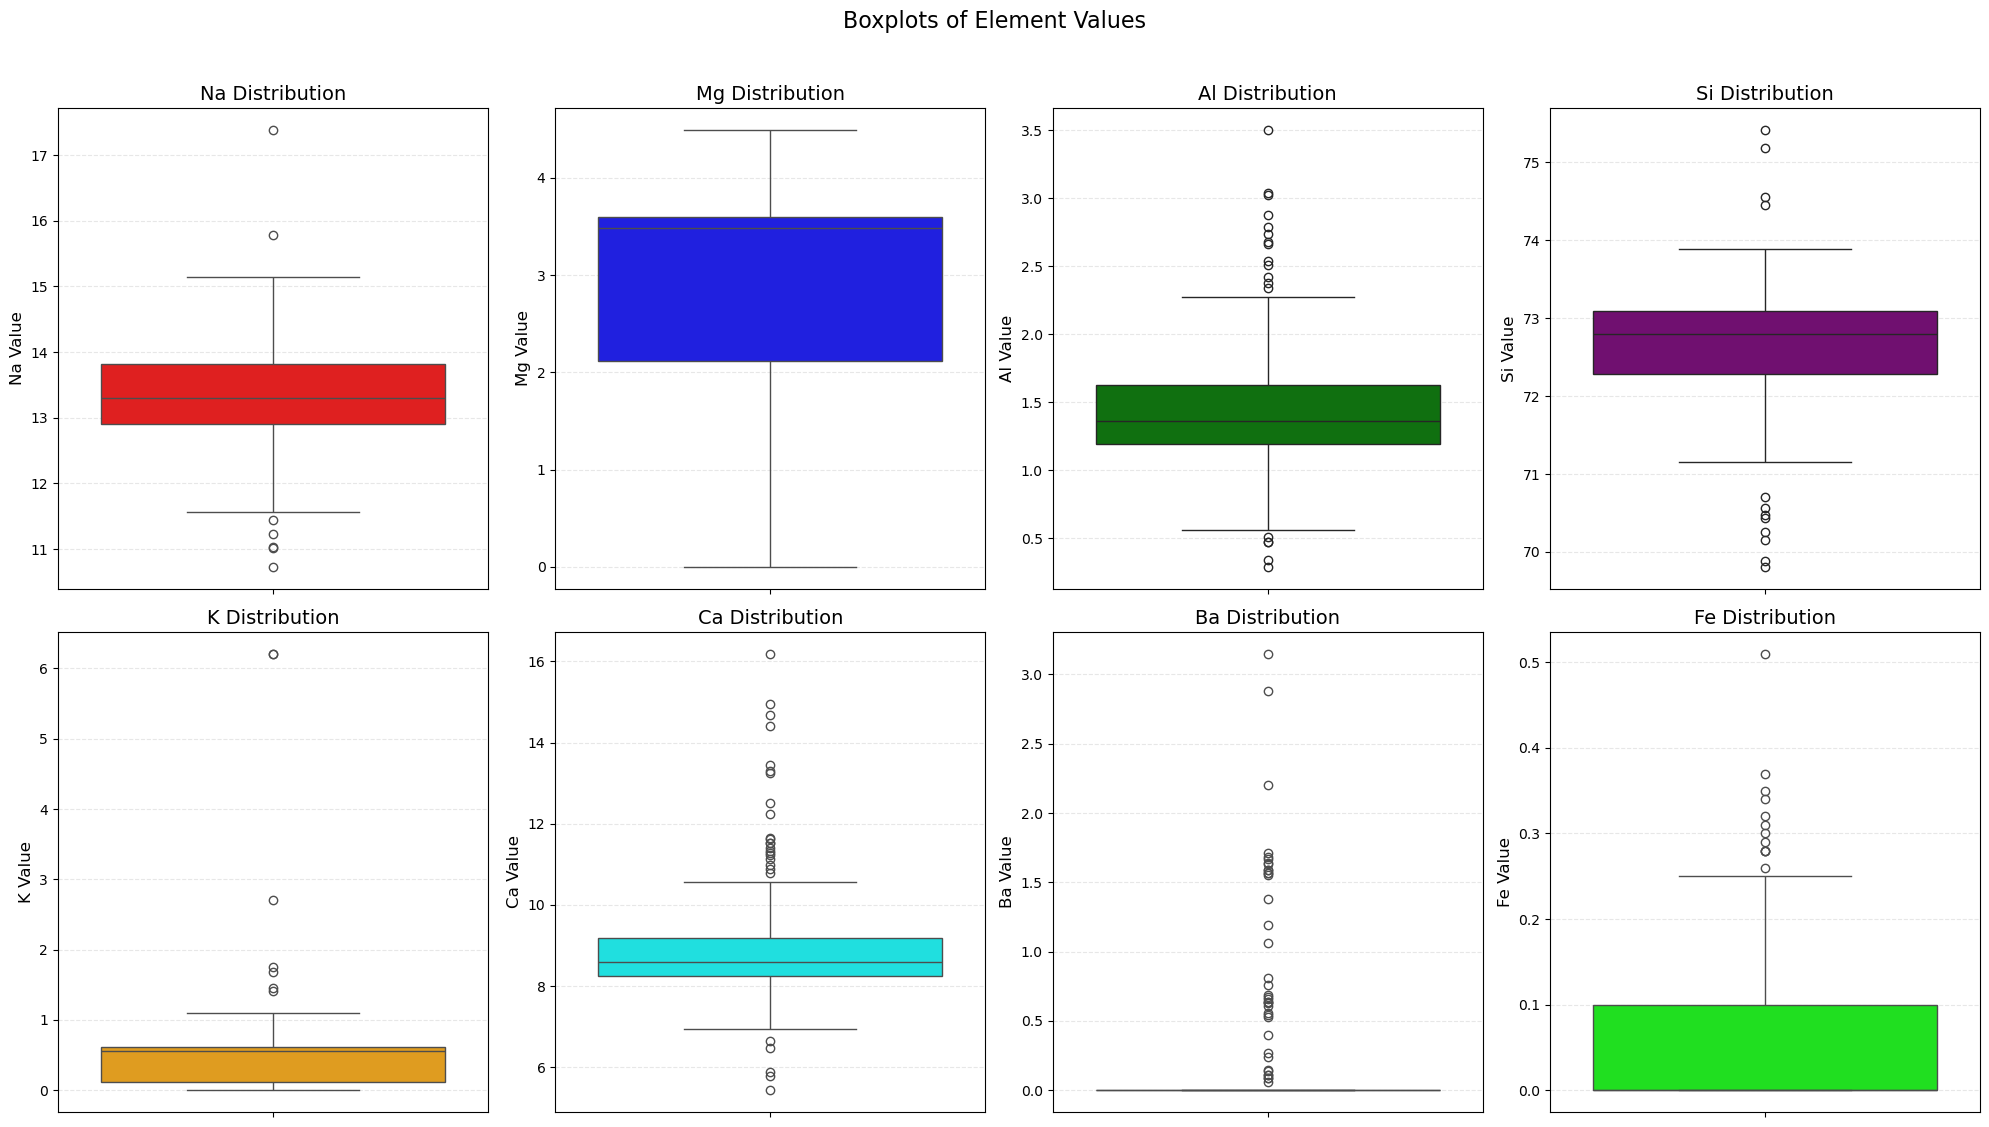

In [26]:
elements = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'lime']

fig, axes = plt.subplots(2, 4, figsize=(20, 11))
fig.suptitle('Boxplots of Element Values', fontsize=16, y=1.02)
axes = axes.flatten()

for i, element in enumerate(elements):
    sns.boxplot(data=df, y=element, ax=axes[i], color=colors[i])
    axes[i].set_title(f'{element} Distribution', fontsize=14)
    axes[i].set_ylabel(f'{element} Value', fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

---
### Visualizing Feature Distributions with Scatterplots
In our case Scatter plot gave us better visuals for outliers

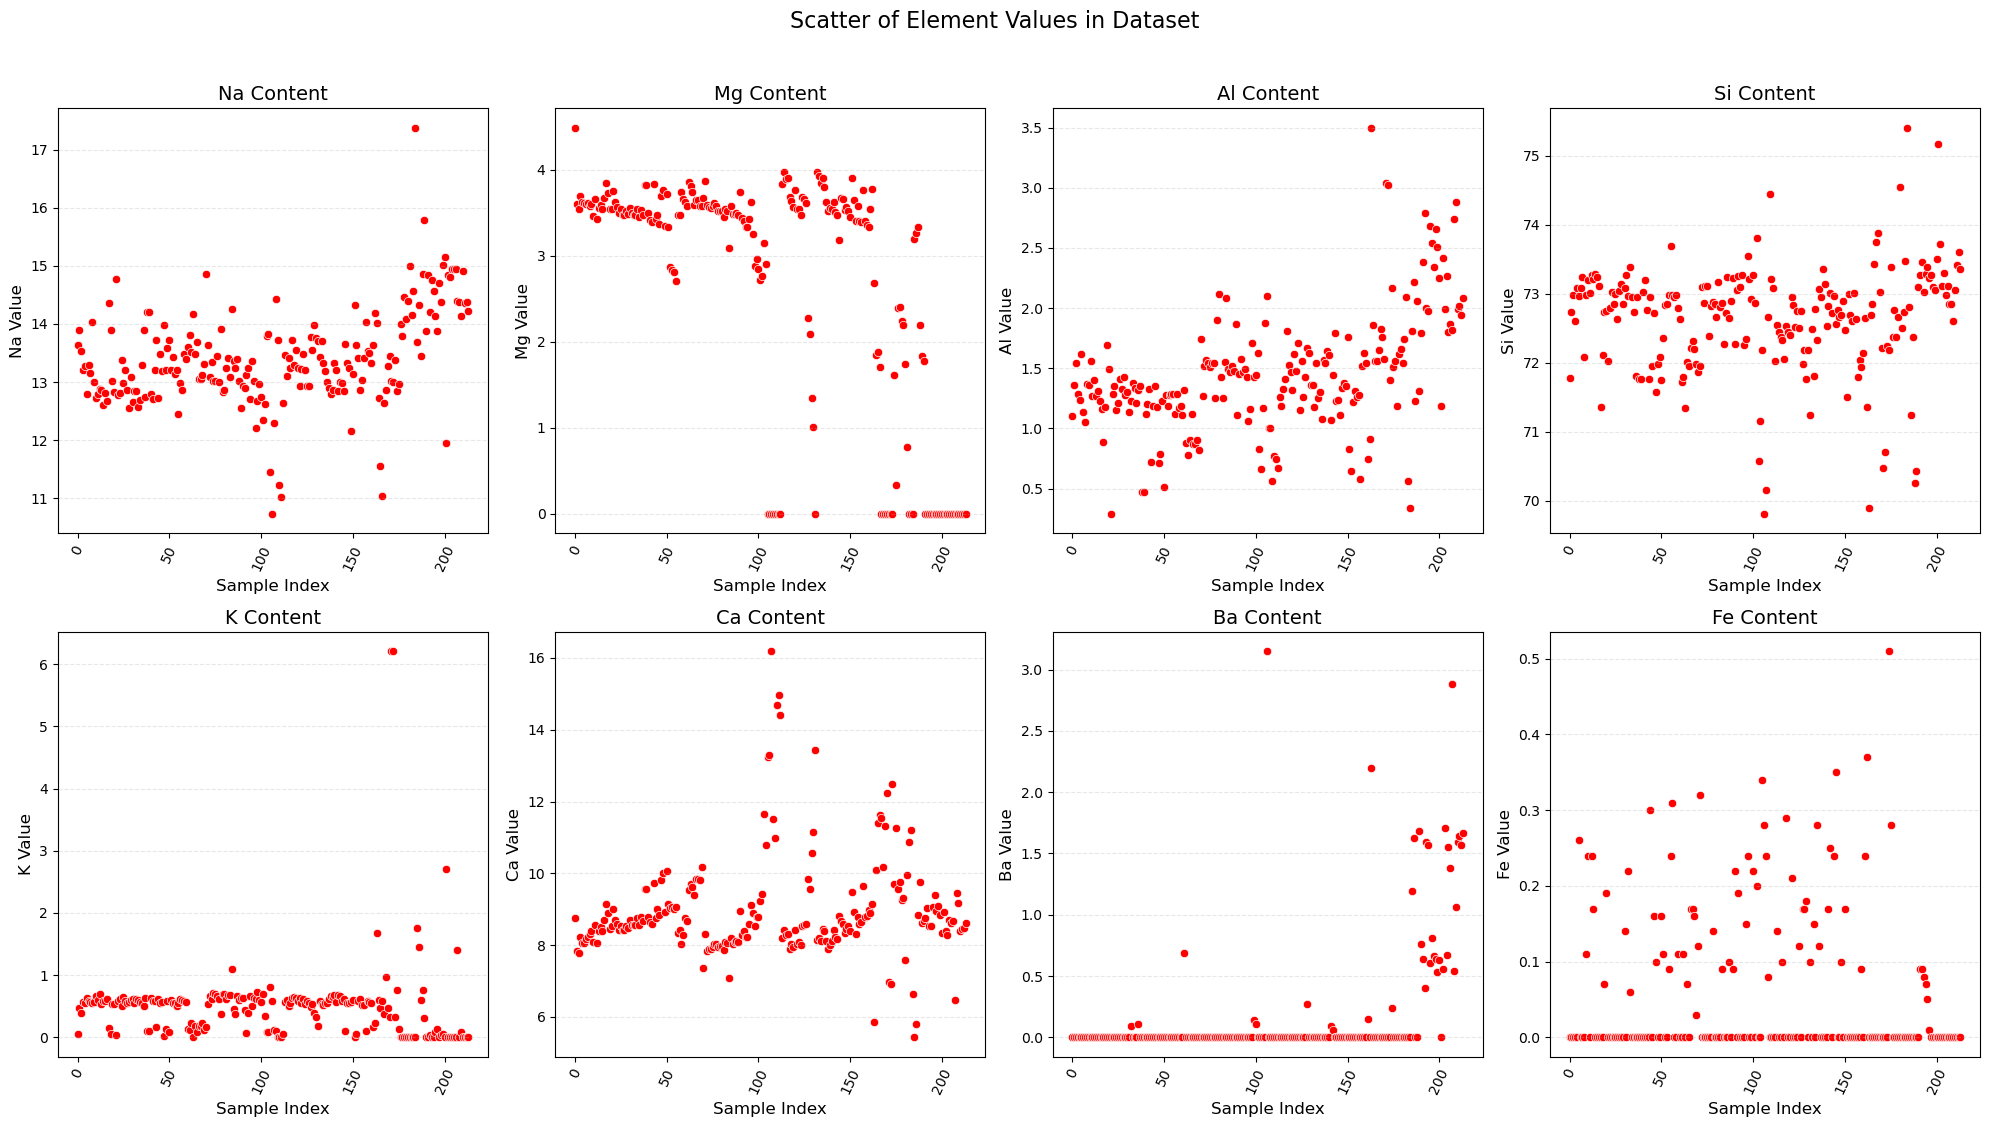

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(20, 11))
fig.suptitle('Scatter of Element Values in Dataset', fontsize=16, y=1.02)
axes = axes.flatten()

for i, element in enumerate(elements):
    sns.scatterplot(x=df.index, y=df[element], ax=axes[i], color='red')
    axes[i].set_title(f'{element} Content', fontsize=14)
    axes[i].set_xlabel('Sample Index', fontsize=12)
    axes[i].set_ylabel(f'{element} Value', fontsize=12)
    axes[i].tick_params(axis='x', rotation=65)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Adjust spacing
plt.tight_layout()
plt.show()

### 1.11 Investigating Specific Outliers

In [30]:
df[df['K'] > 0.8]   #The value 6.21 is outlier

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_name
84,85,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.00,2,Building Windows (Non-Float)
105,106,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2,Building Windows (Non-Float)
163,164,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,Containers
168,169,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00,5,Containers
171,172,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,Containers
172,173,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,Containers
185,186,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7,Headlamps
186,187,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7,Headlamps
201,202,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,7,Headlamps
207,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7,Headlamps


In [31]:
df[(df['Type_name'] == 'Building Windows (Non-Float)') & (df['Ca'] > 10)] #Most of Building windows have high 'Ca' so we'll keep it

,Id,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_name
103,104,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2,Building Windows (Non-Float)
104,105,1.52410,13.83,2.90,1.17,71.15,0.08,10.79,0.00,0.00,2,Building Windows (Non-Float)
105,106,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2,Building Windows (Non-Float)
106,107,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,Building Windows (Non-Float)
107,108,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2,Building Windows (Non-Float)
108,109,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08,2,Building Windows (Non-Float)
109,110,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2,Building Windows (Non-Float)
110,111,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2,Building Windows (Non-Float)
111,112,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2,Building Windows (Non-Float)
112,113,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2,Building Windows (Non-Float)


---
### 1.12 Removing Outliers
Later we found out that removing these values significantly affect accuracy (lowers it by at least 7%)

In [33]:
# df = df[df['K'] <= 6]
# df = df[df['Fe'] <= 0.5]
# df = df[df['Ba'] <= 3]
# df = df[df['Na'] <= 17]

print(df.shape)

(214, 12)


---


# 2. Data Visualization

### 2.1 Distribution of Glass Types

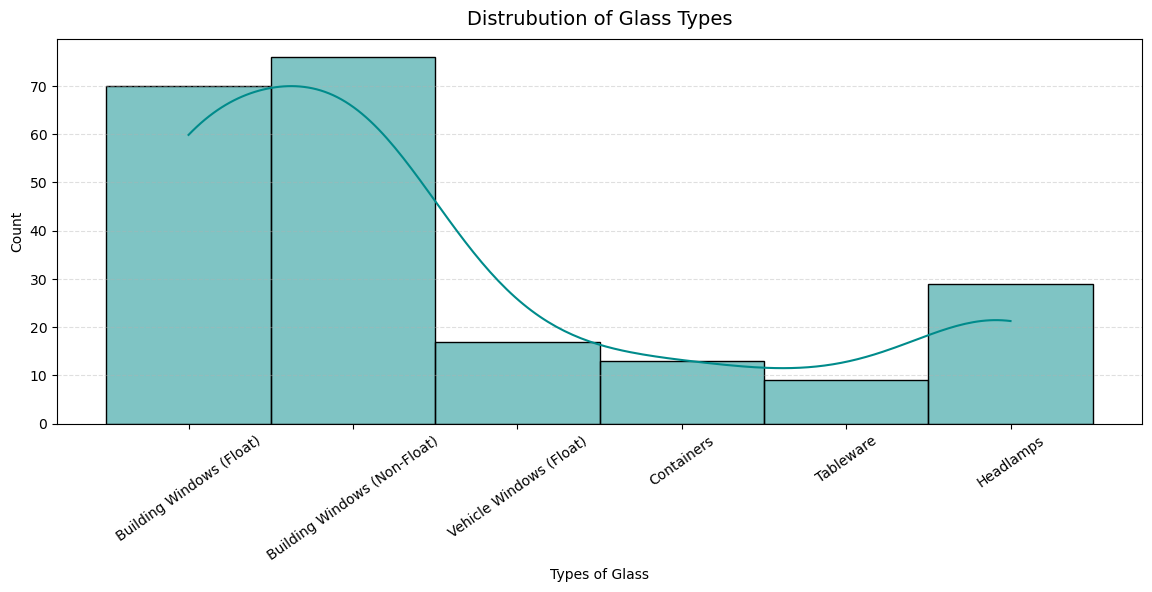

In [37]:
plt.figure(figsize=(14,5))
sns.histplot(data = df['Type_name'], color = 'darkcyan',kde=True, edgecolor = 'black')
plt.title('Distrubution of Glass Types', fontsize = 14, pad=10)
plt.xlabel('Types of Glass')
plt.xticks(rotation = 35)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

---
### 2.2 Average Composition of Elements by Glass Type
We visualize the mean content of each element for different glass types using grouped bar plots.

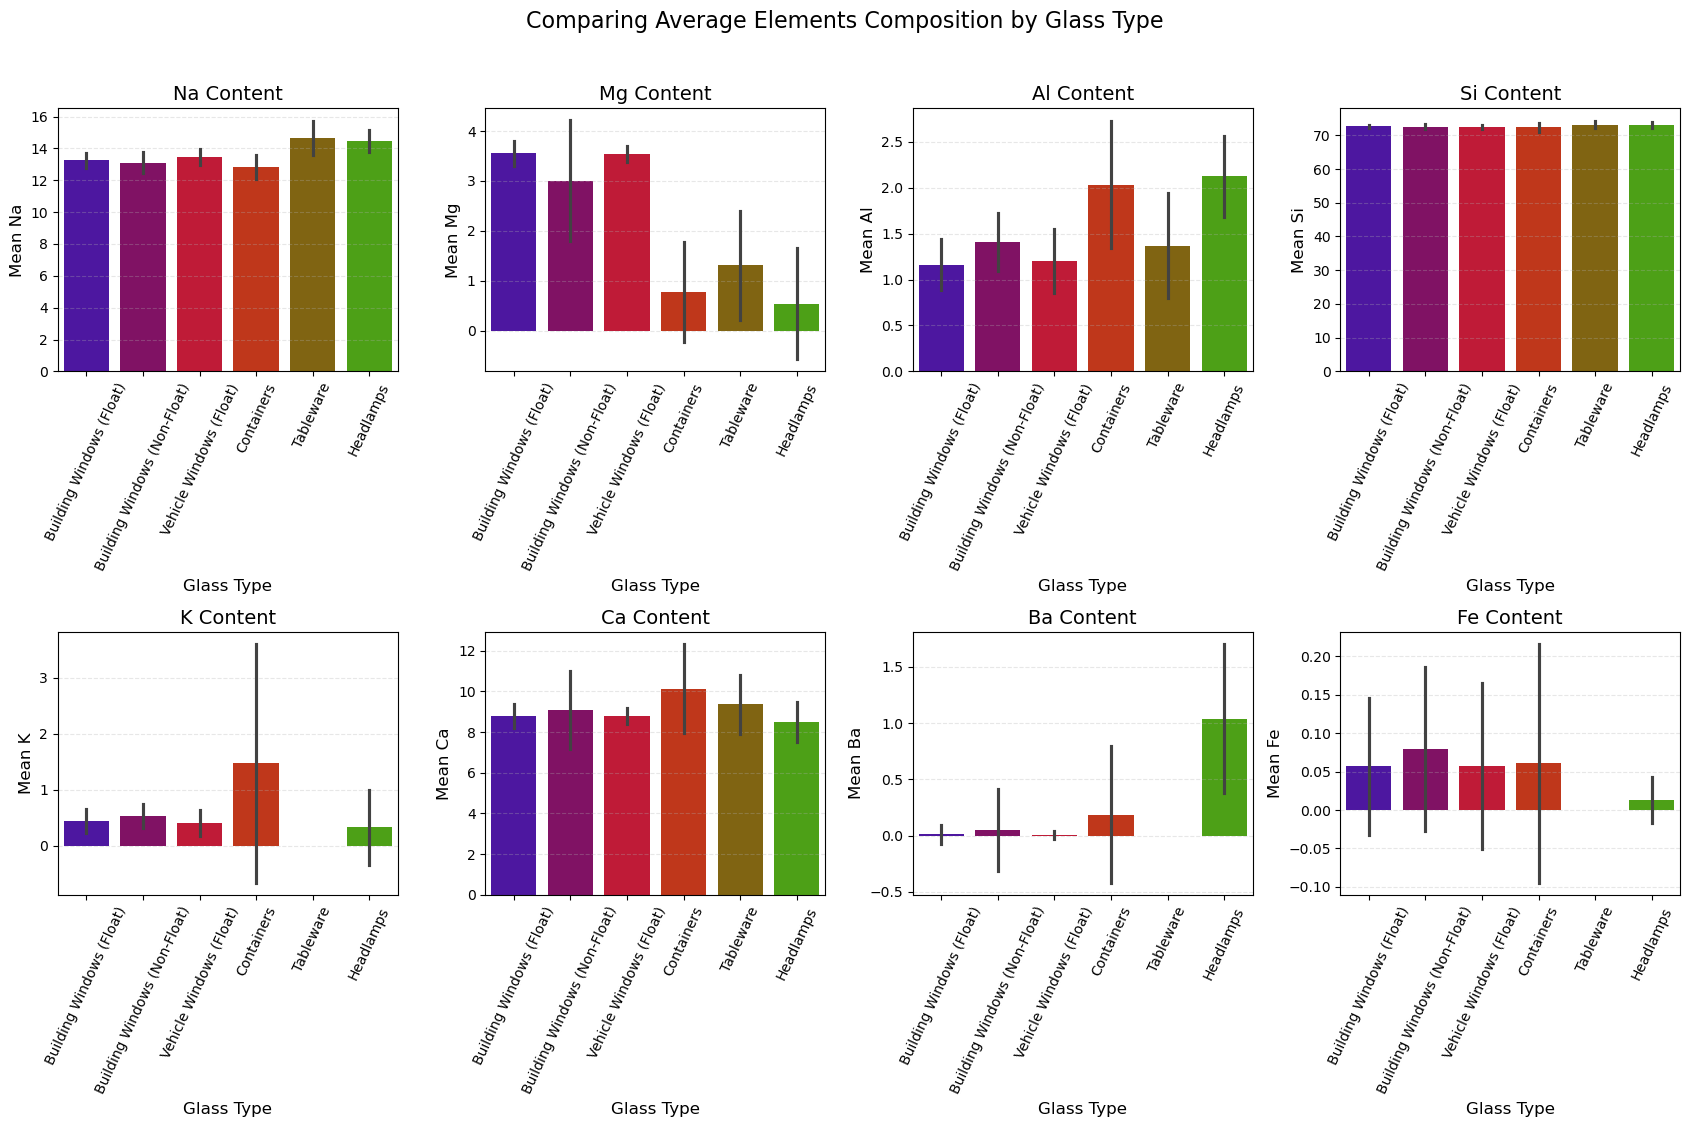

In [39]:
fig, axes = plt.subplots(2, 4, figsize=(17, 11))
fig.suptitle('Comparing Average Elements Composition by Glass Type', fontsize=16, y=1.02)
axes = axes.flatten()  # Convert 2x4 grid into a flat list for easy looping

for i, element in enumerate(elements):
    sns.barplot(data=df, x='Type_name', y=element, ax=axes[i], estimator='mean',ci='sd',palette='brg')
    axes[i].set_title(f'{element} Content', fontsize=14)
    axes[i].set_xlabel('Glass Type', fontsize=12)
    axes[i].set_ylabel(f'Mean {element}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=65)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Adjust spacing
plt.tight_layout()
plt.show()

---
### 2.3 Element Composition for Each Glass Type
These plots highlight the average composition of elements within each glass category, helping identify characteristic features.

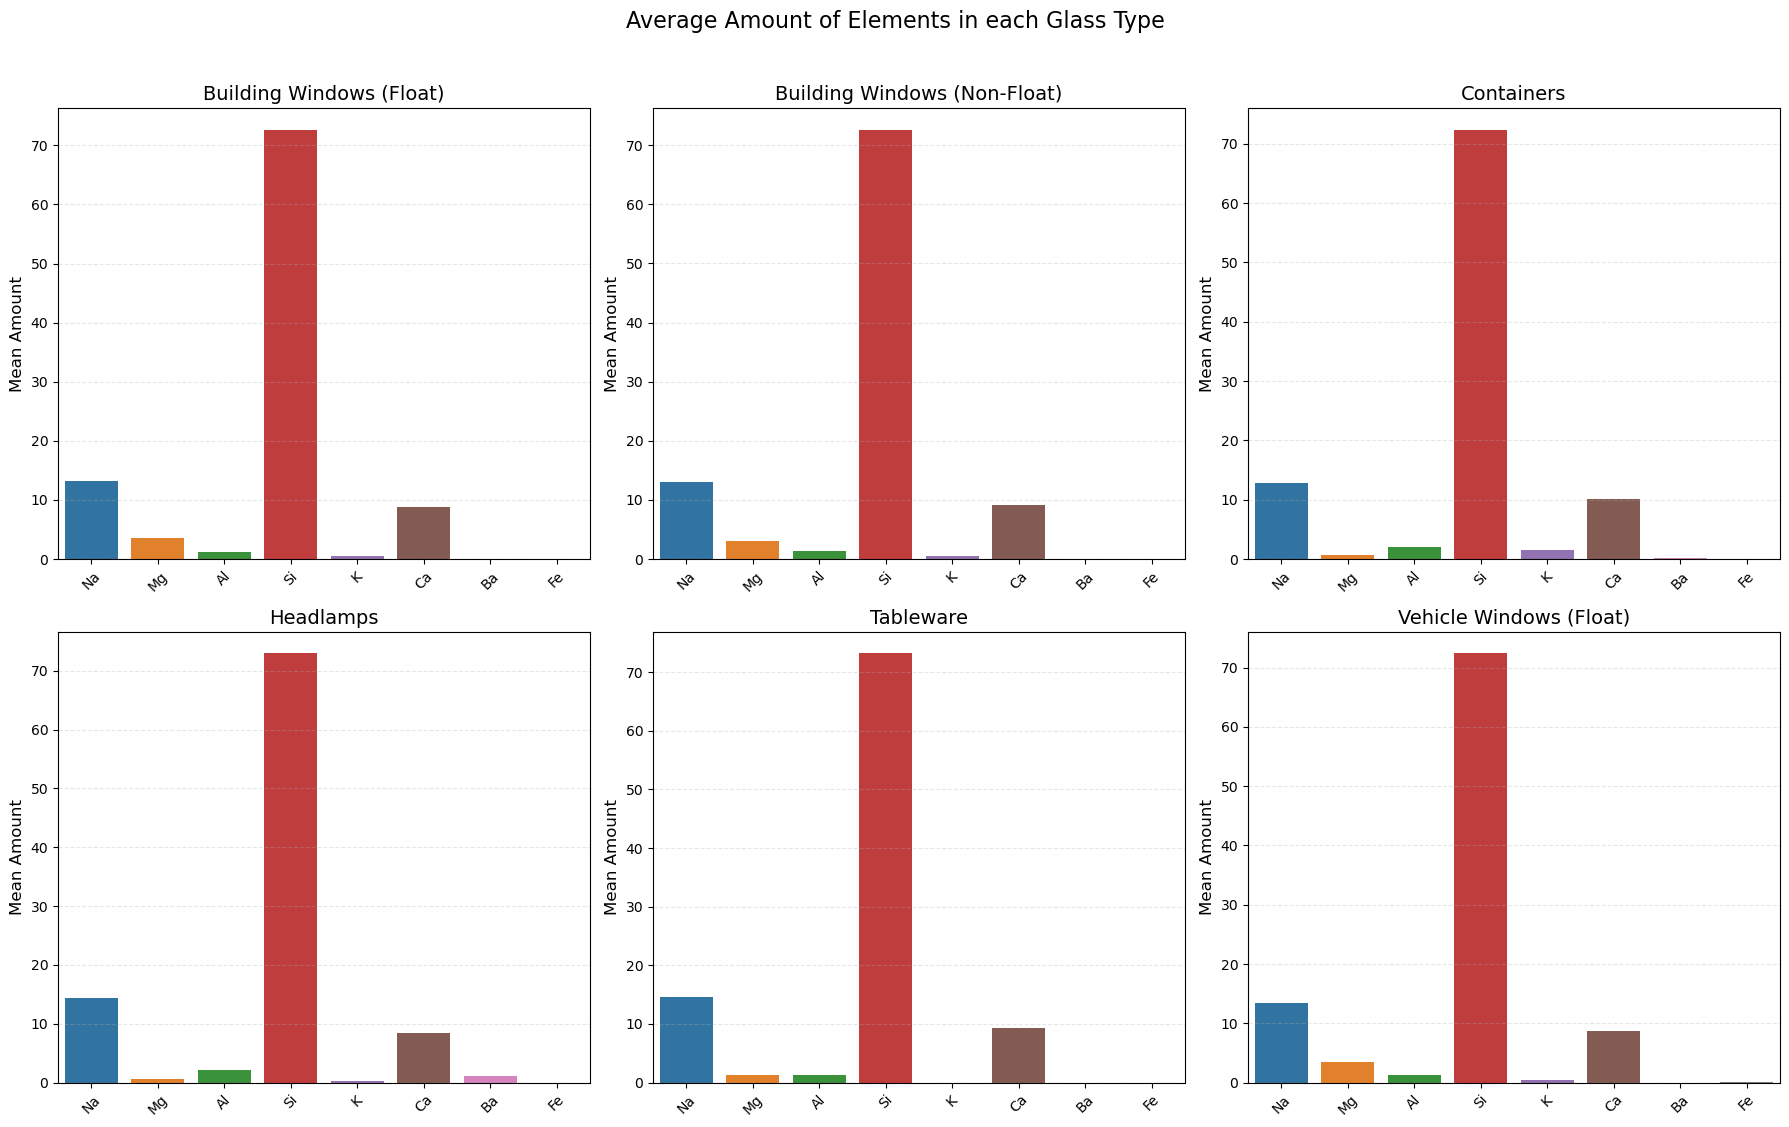

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
fig.suptitle('Average Amount of Elements in each Glass Type', fontsize=16, y=1.02)
axes = axes.flatten()

glass_means = df.groupby('Type_name')[elements].mean()

for i, glass_type in enumerate(glass_means.index):
    data = glass_means.loc[glass_type].reset_index()
    data.columns = ['Element', 'Mean_Value']
    
    sns.barplot(data=data, x='Element', y='Mean_Value', ax=axes[i], palette='tab10')
    
    axes[i].set_title(f'{glass_type}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Mean Amount', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

---
### 2.4 Correlation & Selection of Features
* The correlation heatmap shows how strongly the numeric features relate to each other. 
* --> According to heatmap we can drop **'Refractive Index'** and **'Fe'** (Dropped in the splitting part)

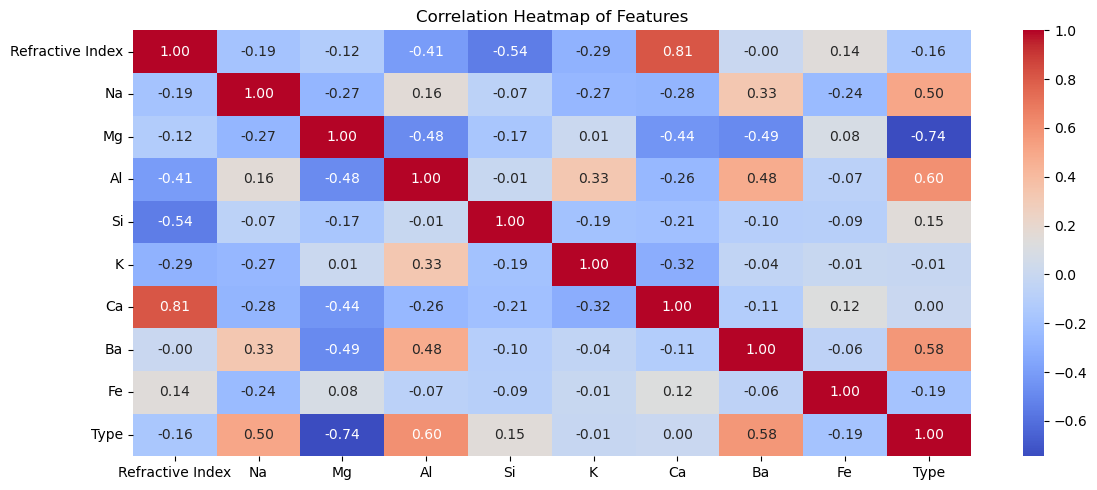

In [43]:
plt.figure(figsize=(12,5))
sns.heatmap(data=df.drop(['Id','Type_name'], axis=1).corr(),annot=True, cmap = 'coolwarm' , fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

---
## Feature Scaling
We use StandardScaler to make all features have similar ranges by setting their average to 0 and standard deviation to 1. This helps improve the performance of many machine learning models.

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop(['Id','Fe','Ca','Type_name', 'Type'], axis=1) 
y = df['Type']
X = scaler.fit_transform(X)  

---
## Splitting of the data

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### We verify the dimensions of the training and test sets to ensure the split was successful.

In [49]:
X_train.shape, X_test.shape

((171, 7), (43, 7))

In [50]:
y_train.shape, y_test.shape

((171,), (43,))

---
## Handling Imbalance issue in the data
We use SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data by generating synthetic examples for underrepresented classes.

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=1)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [53]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((372, 7), (372,), (43, 7), (43,))

## Next Step: Model Training 

---

# Preprocessing Summary
## We explored the dataset to understand its structure, checked for missing values and duplicates, and handled outliers through visual and statistical methods.

## Then, we applied feature scaling using StandardScaler to prepare the data for modeling, ensuring all features are on a comparable scale.

---
# Modelling

### Confusion Matrix 

In [59]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
def confusion_mat(y_pred):
    plt.figure(figsize=(12, 5))  # Width, Height (in inches)
    
    # Plot confusion matrix with annotations
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        xticklabels=df['Type_name'].unique(), 
        yticklabels=df['Type_name'].unique(),
        annot_kws={'size': 10},  # Font size for annotations
        cmap='Reds',
        cbar=False
    )
    
    # Customize labels and title
    plt.xticks(rotation=30, ha='right', fontsize=10)  # Rotate x-axis labels
    plt.yticks(rotation=0, fontsize=10)  # Align y-axis labels
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16, pad=20)
    
    # Tight layout to prevent label cutoff
    plt.tight_layout()
    plt.show()


## 1. Logistic Regression

- **Strengths**: Provided a solid baseline with 70% test accuracy and good interpretability. Multinomial formulation handled the multiclass problem well.
- **Weaknesses**: The model struggled with complex boundaries and underperformed on minority classes like Vehicle Windows.


In [61]:
# #GridSearch is used to find the best parameters for models
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Define the model
# logreg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)

# # Define hyperparameters to tune
# param_grid = {
#     'C': [0.01, 0.1, 1, 10,100],                   # Regularization strength
#     'penalty': ['l2', 'none'],                # Penalty types
#     'solver': ['saga', 'lbfgs'],              # Solvers that support multinomial
# }

# # Grid Search
# grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Best model
# best_logreg = grid_search.best_estimator_
# print("Best Hyperparameters:", grid_search.best_params_)


Logistic Regression Training Accuracy: 0.8172043010752689
Logistic Regression Testing Accuracy: 0.6976744186046512
              precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       0.83      0.36      0.50        14
           3       0.25      0.67      0.36         3
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.70        43
   macro avg       0.74      0.79      0.73        43
weighted avg       0.77      0.70      0.69        43



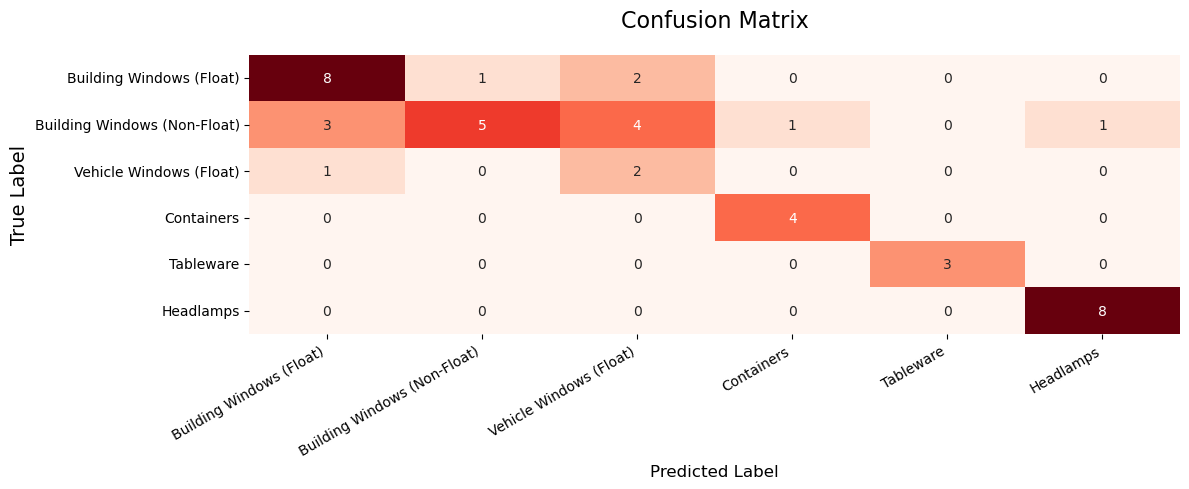

In [62]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial',C= 1, penalty = 'l2', solver ='saga')
logreg.fit(X_train,y_train)

y_pred_logreg = logreg.predict(X_test)

logreg_train = logreg.score(X_train,y_train)
logreg_test = logreg.score(X_test,y_test)

print('Logistic Regression Training Accuracy:', logreg.score(X_train,y_train))
print('Logistic Regression Testing Accuracy:', logreg.score(X_test,y_test))
print(classification_report(y_test, y_pred_logreg))
confusion_mat(y_pred_logreg)

---
## 2. Random Forest
**Strengths**: The ensemble approach delivered strong 83.7% test accuracy by effectively modeling non-linear relationships, showed natural robustness to outliers due to its tree-based structure, and provided valuable feature importance metrics that helped interpret the glass composition patterns.  

**Weaknesses**: Despite parameter tuning, the model exhibited severe overfitting with an 18% gap between training and test accuracy, required significant computational resources, and showed unstable performance across different hyperparameter configurations.

Random Forest Training Accuracy: 0.8790322580645161
Random Forest Testing Accuracy: 0.8372093023255814
              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       1.00      0.57      0.73        14
           3       0.67      0.67      0.67         3
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.85      0.87      0.85        43
weighted avg       0.87      0.84      0.83        43



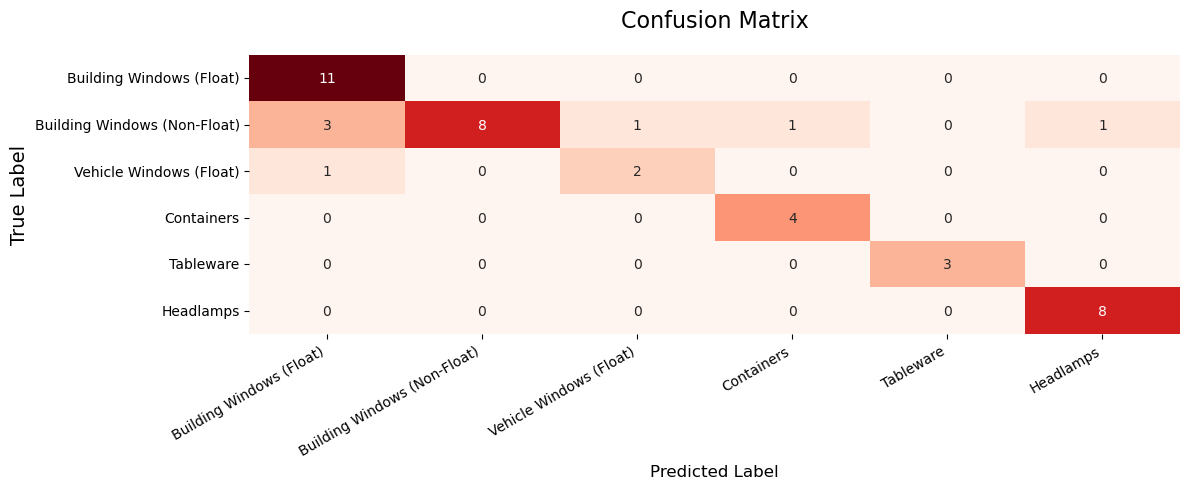

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=4,
    min_samples_split=6,
    min_samples_leaf=3,
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

print('Random Forest Training Accuracy:', rf_train)
print('Random Forest Testing Accuracy:', rf_test)
print(classification_report(y_test, y_pred_rf))
confusion_mat(y_pred_rf)

---
## 3. SVM
**Strengths**: The support vector machine achieved competitive 79% accuracy through its effective margin maximization strategy, handled the high-dimensional feature space efficiently, and the One-vs-One approach successfully managed class separation challenges.  

**Weaknesses**: The linear kernel's simplicity constrained its pattern recognition capabilities, the model was computationally intensive to train, and it demanded careful feature scaling to perform optimally.

SVM Training Accuracy: 0.8360215053763441
SVM Testing Accuracy: 0.7906976744186046
              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           2       1.00      0.71      0.83        14
           3       0.33      0.67      0.44         3
           5       1.00      1.00      1.00         4
           6       0.67      0.67      0.67         3
           7       0.88      0.88      0.88         8

    accuracy                           0.79        43
   macro avg       0.77      0.79      0.77        43
weighted avg       0.84      0.79      0.80        43



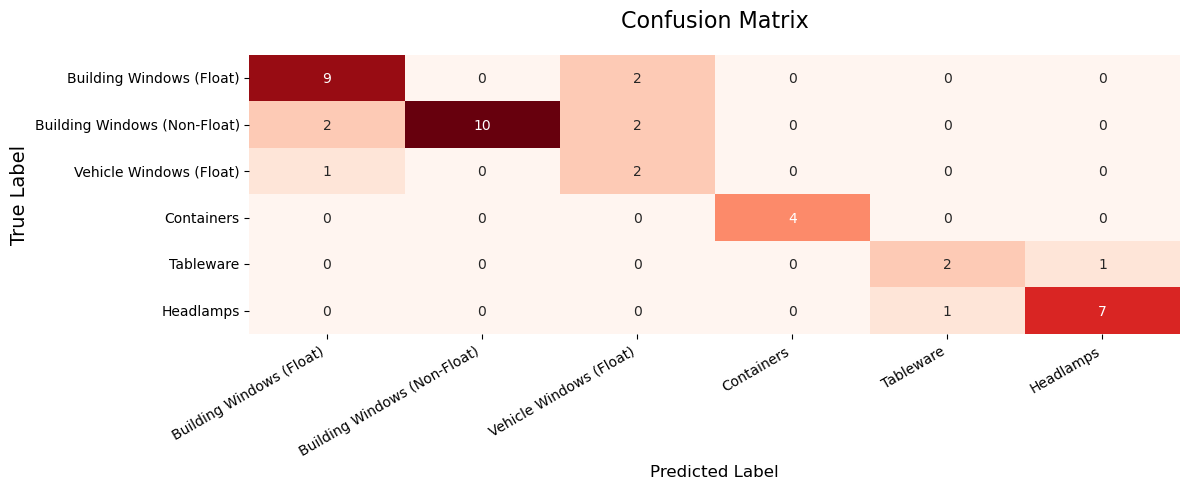

In [163]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

svm = OneVsOneClassifier(SVC(kernel='linear', C=1))
#{'poly', 'linear', 'sigmoid', 'precomputed', 'rbf'}
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

svm_train = svm.score(X_train, y_train)
svm_test = svm.score(X_test, y_test)

print('SVM Training Accuracy:', svm_train)
print('SVM Testing Accuracy:', svm_test)
print(classification_report(y_test, y_pred_svm))
confusion_mat(y_pred_svm)

---
## 4. KNN

- **Strengths**: Delivered strong performance with 86.4% test accuracy by leveraging local patterns. No training phase needed and intuitive behavior.
- **Weaknesses**: Sensitive to noise and choice of `k`. High latency during prediction due to brute-force nature.


KNN Training Accuracy: 0.9247311827956989
KNN Testing Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       1.00      0.71      0.83        14
           3       0.43      1.00      0.60         3
           5       1.00      1.00      1.00         4
           6       0.75      1.00      0.86         3
           7       1.00      0.88      0.93         8

    accuracy                           0.86        43
   macro avg       0.85      0.92      0.86        43
weighted avg       0.92      0.86      0.87        43



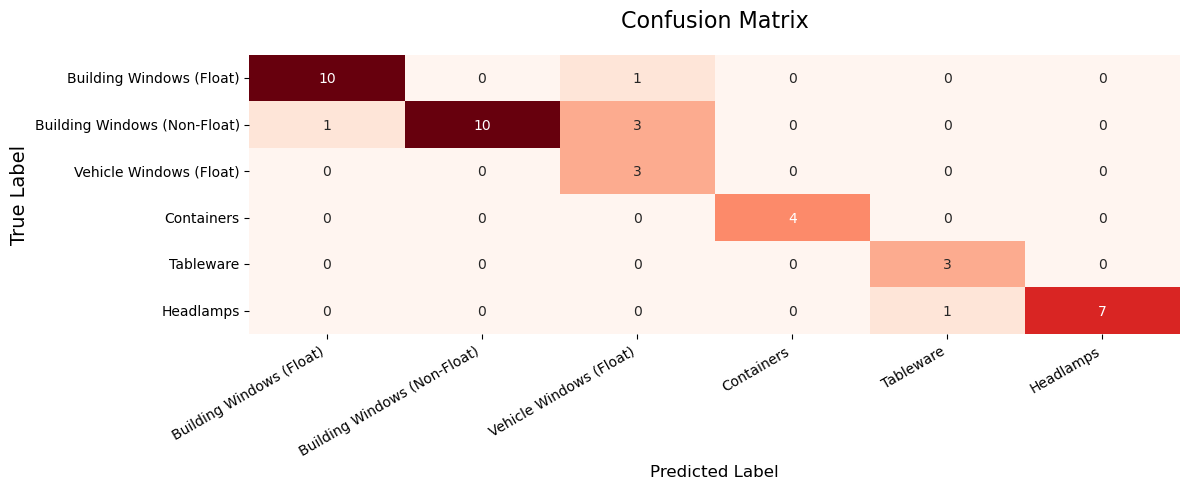

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,p=3)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = knn.score(X_train,y_train)
knn_test = knn.score(X_test,y_test)

print('KNN Training Accuracy:', knn_train)
print('KNN Testing Accuracy:', knn_test)
print(classification_report(y_test, y_pred_knn))
confusion_mat(y_pred_knn)

---
## 5. Gradient Boost
**Strengths**: These boosting methods demonstrated powerful non-linear modeling capacity, with XGBoost particularly offering advanced regularization options and effective handling of diverse feature types.  

**Weaknesses**: Both variants overfit catastrophically (reaching 100% training accuracy), demanded extensive hyperparameter tuning, and required significant computational power for training.

GB Training Accuracy: 1.0
GB Testing Accuracy: 0.8604651162790697


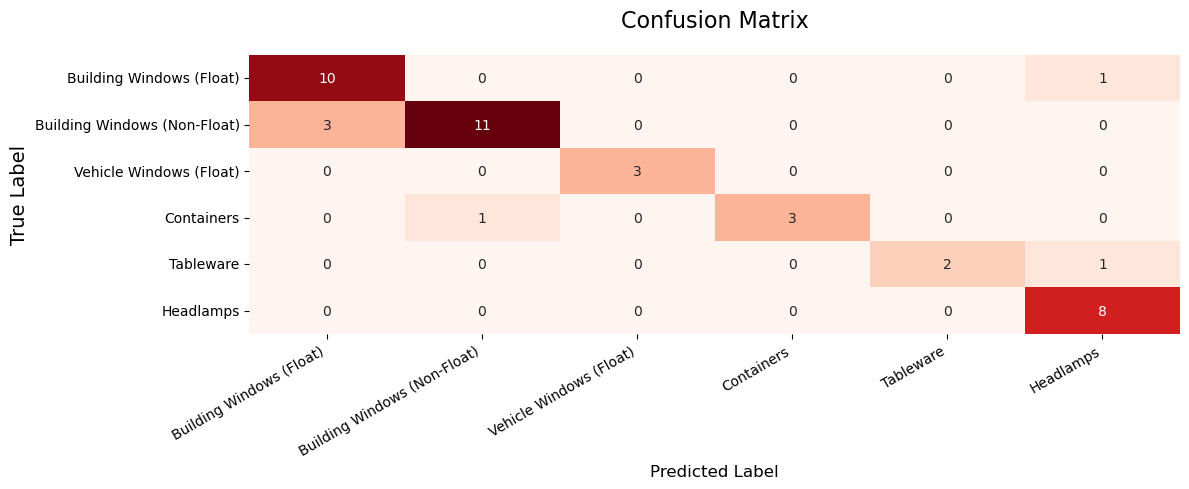

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print('GB Training Accuracy:', gb.score(X_train,y_train))
print('GB Testing Accuracy:', gb.score(X_test,y_test))
confusion_mat(y_pred_gb)

---
## 6. XGBoost 
(Same as Gradient Boost)

- **Strengths**: Delivered powerful non-linear modeling and reached 81.7% test accuracy. Effectively handled class imbalance with sample weighting.
- **Weaknesses**: Required careful tuning and was prone to overfitting on small data without regularization.


Training Accuracy: 1.0
Testing Accuracy: 0.813953488372093


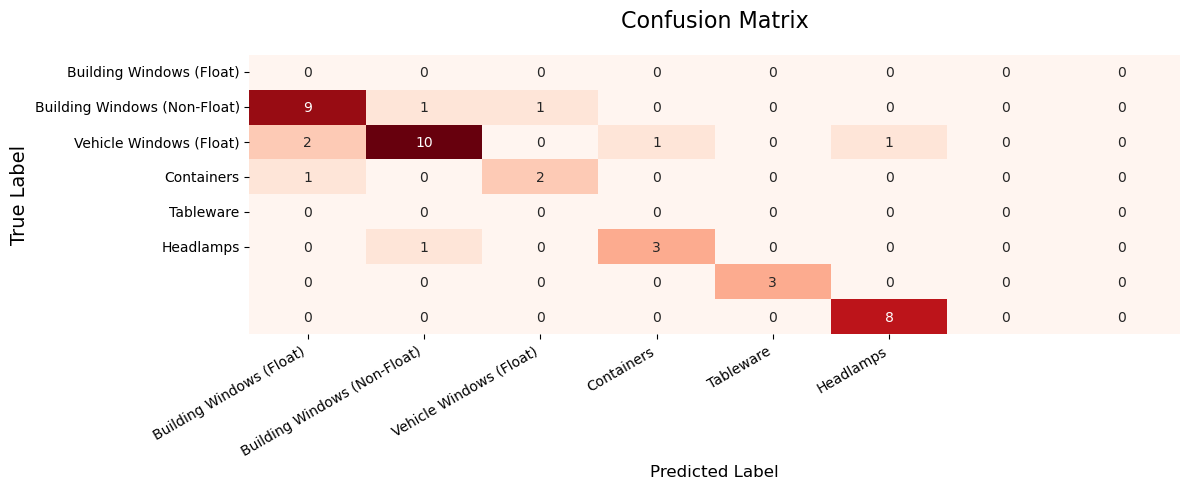

In [72]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Adjust labels to start from 0 (important for XGBoost)
le = LabelEncoder()
y_train_adjusted = le.fit_transform(y_train)
y_test_adjusted = le.transform(y_test)

# Calculate class weights manually
class_counts = np.bincount(y_train_adjusted)  # counts for each class
total_samples = len(y_train_adjusted)
class_weights = total_samples / (len(class_counts) * class_counts)

# Assign sample weight for each instance
sample_weights = class_weights[y_train_adjusted]

# Define the XGBClassifier with best hyperparameters
xgb = XGBClassifier(
    colsample_bytree=0.8,
    gamma=0.5,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    n_estimators=150,
    reg_alpha=0,
    reg_lambda=0,
    subsample=0.9
)

# Fit the model
xgb.fit(X_train, y_train_adjusted,sample_weight=sample_weights)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print('Training Accuracy:', xgb.score(X_train, y_train_adjusted))
print('Testing Accuracy:', xgb.score(X_test, y_test_adjusted))
confusion_mat(y_pred_xgb)


---
## 7. CatBoost
**Strengths**: The model delivered best-in-class 83.5% test accuracy, featured automatic handling of categorical gradients, and maintained remarkable robustness across different parameter configurations.  

**Weaknesses**: It still displayed some overfitting tendencies, was less interpretable than simpler models, and carried a substantial memory footprint during operation. 

CatBoost Training Accuracy: 1.0
CatBoost Testing Accuracy: 0.8372093023255814


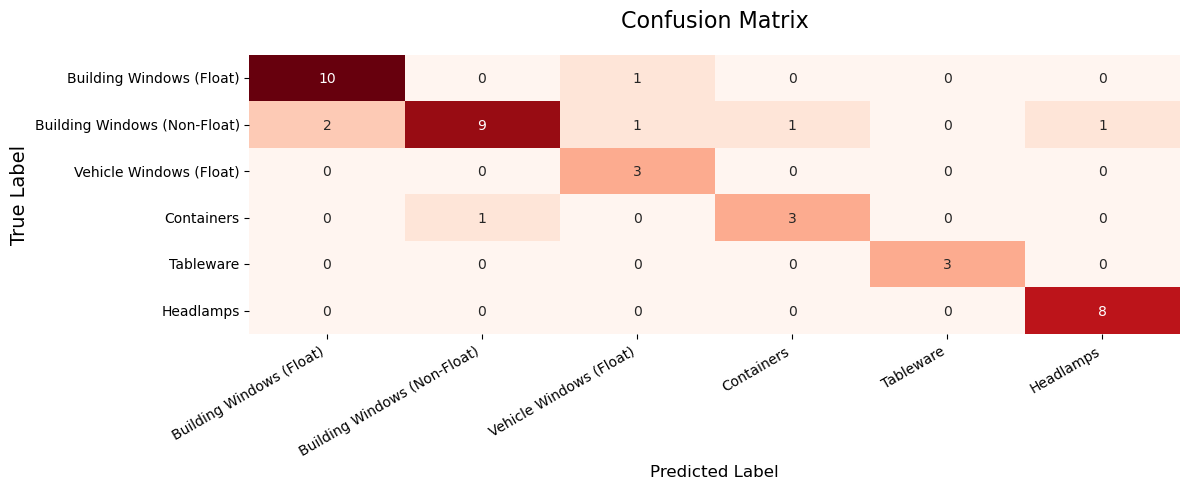

In [74]:
from catboost import CatBoostClassifier

class CatBoost1D(CatBoostClassifier):
    def predict(self, X):
        return super().predict(X).ravel()
#ravel is used to return 1D array like other models because catboost return 2D array as prediction

cat = CatBoost1D(verbose=0, loss_function='MultiClass') # set verbose=0 to avoid long output
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test) 

print('CatBoost Training Accuracy:', cat.score(X_train, y_train))
print('CatBoost Testing Accuracy:', cat.score(X_test, y_test))
confusion_mat(y_pred_cat)

---
## 8. Naive Bayes
**Strengths**: This approach offered blazing-fast training and prediction speeds, had trivial implementation requirements, and worked acceptably with limited data.  

**Weaknesses**: The 40% test accuracy reflected fundamental failure due to invalid independence assumptions, and it completely missed critical feature interactions in the glass chemistry data.

Naive Bayes Training Accuracy: 0.5887096774193549
Naive Bayes Testing Accuracy: 0.3953488372093023


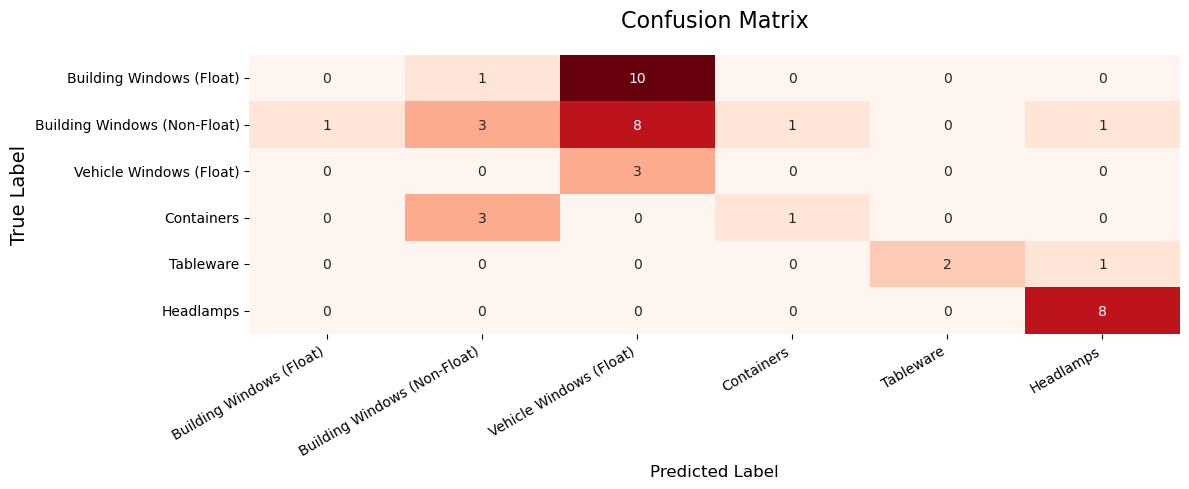

In [76]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print('Naive Bayes Training Accuracy:', nb.score(X_train, y_train))
print('Naive Bayes Testing Accuracy:', nb.score(X_test, y_test))
confusion_mat(y_pred_nb)

---
## 9. AdaBoost
**Strengths**: The ensemble framework had theoretical potential through combining weak learners, and offered automatic feature selection capabilities.  

**Weaknesses**: The 53% test accuracy was worse than random guessing for some classes, default decision stumps proved hopelessly inadequate, and the model was extremely sensitive to data noise.  

AdaBoost Training Accuracy: 0.489247311827957
AdaBoost Testing Accuracy: 0.5348837209302325


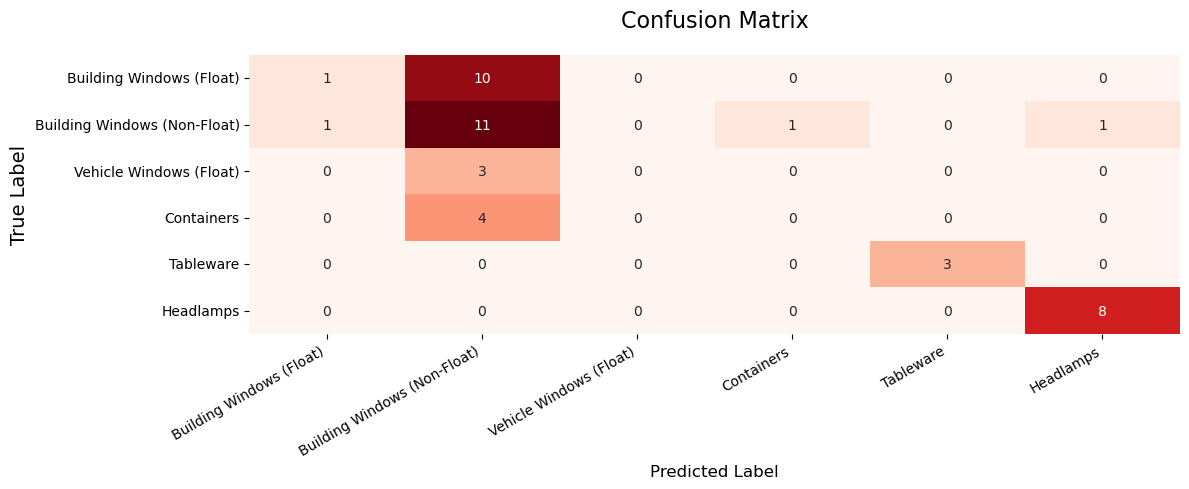

In [78]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost with a base decision tree classifier
ada_boost = AdaBoostClassifier(
    n_estimators=25,  
    random_state=42
)

ada_boost.fit(X_train, y_train)

y_pred_ada_boost = ada_boost.predict(X_test)

print('AdaBoost Training Accuracy:', ada_boost.score(X_train, y_train))
print('AdaBoost Testing Accuracy:', ada_boost.score(X_test, y_test))
confusion_mat(y_pred_ada_boost)

---
## 10. Model Combination (Ensemble)
**(SVM + Random Forest + KNN)**

- **Strengths**: Combined diverse classifiers for improved robustness and accuracy. Achieved 81.4% test accuracy and reduced variance in predictions.
- **Weaknesses**: Complexity increased due to integration and hyperparameter coordination.


Ensemble Training Accuracy: 0.9059139784946236
Ensemble Testing Accuracy: 0.8837209302325582
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       1.00      0.79      0.88        14
           3       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         4
           6       0.75      1.00      0.86         3
           7       1.00      0.88      0.93         8

    accuracy                           0.88        43
   macro avg       0.87      0.89      0.87        43
weighted avg       0.90      0.88      0.88        43



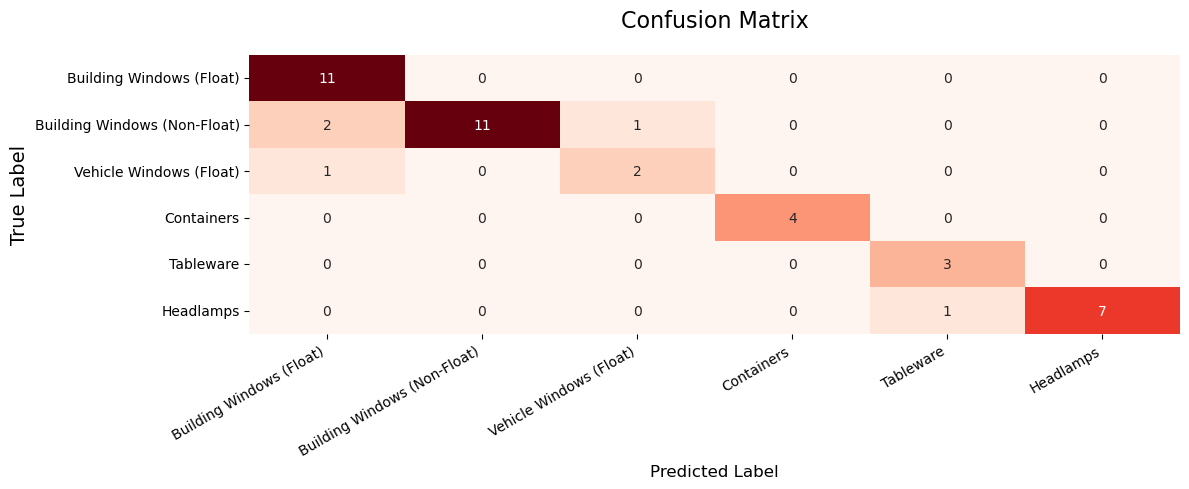

In [80]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('svm', svm), ('rf', rf), ('knn', knn)], weights=[2,2,1])
ensemble.fit(X_train, y_train)
y_pred_ens = ensemble.predict(X_test)

ens_train = ensemble.score(X_train,y_train)
ens_test = ensemble.score(X_test,y_test)

print('Ensemble Training Accuracy:', ens_train)
print('Ensemble Testing Accuracy:', ens_test)
print(classification_report(y_test, y_pred_ens))
confusion_mat(y_pred_ens)

---
## 11. Deep Learning
**Strengths**: The architecture theoretically could capture complex hierarchical patterns, offered flexible design options, and scaled well to larger datasets.  

**Weaknesses**: The 55% average test accuracy revealed complete failure, caused by severe overfitting (75% average train accuracy) and grossly insufficient training data for the chosen architecture.

Usually doesn't perform good on small data

In [82]:
import tensorflow as tf
from tensorflow import keras

NN = keras.Sequential([
    keras.layers.Dense(196, input_shape=(7,), activation='relu'),
    keras.layers.Dense(89, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(49, activation='relu'),
    keras.layers.Dense(8, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.05)
NN.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = NN.fit(
    X_train, y_train,
    epochs=50,  # Allow much longer training
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

y_pred_NN = NN.predict(X_test)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3067 - loss: 1.8883 - val_accuracy: 0.8533 - val_loss: 0.4620
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5353 - loss: 1.0484 - val_accuracy: 0.7467 - val_loss: 0.8177
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5436 - loss: 1.1511 - val_accuracy: 0.8933 - val_loss: 0.3891
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5528 - loss: 0.9434 - val_accuracy: 0.9467 - val_loss: 0.3095
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6408 - loss: 1.2409 - val_accuracy: 0.7733 - val_loss: 0.7568
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5873 - loss: 0.9751 - val_accuracy: 0.9600 - val_loss: 0.1268
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7118 - loss: 0.7508 - val_accuracy: 0.8400 - val_loss: 0.6502
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6883 - loss: 0.8763 - val_accuracy: 0.8133 - val_loss

In [83]:
train_loss, train_accuracy = NN.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = NN.evaluate(X_test, y_test, verbose=0)

print(f'Train Accuracy: {train_accuracy:.4f},\nTrain Loss: {train_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f},\nTest Loss: {test_loss:.4f}')

Train Accuracy: 0.7554,
Train Loss: 0.5404
Test Accuracy: 0.6047,
Test Loss: 0.7714


---
# Cross Validation & Evaluation

## 1. Repeated Stratified KFold CV
Most suitable for small dataset as we can see here the results are the best out of the 3 ways.

In [86]:
from sklearn.model_selection import RepeatedStratifiedKFold,LeaveOneOut, cross_val_score

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

# KNN
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=rskf, scoring='accuracy')
print(f'KNN - Avg Accuracy: {cv_scores_knn.mean():.2%} (±{cv_scores_knn.std():.2%})')

# SVM
cv_scores_svm = cross_val_score(svm, X_train, y_train, cv=rskf, scoring='accuracy')
print(f'SVM - Avg Accuracy: {cv_scores_svm.mean():.2%} (±{cv_scores_svm.std():.2%})')

# Random Forest
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=rskf, scoring='accuracy')
print(f'Random Forest - Avg Accuracy: {cv_scores_rf.mean():.2%} (±{cv_scores_rf.std():.2%})')

# Logistic Regression
cv_scores_lr = cross_val_score(logreg, X_train, y_train, cv=rskf, scoring='accuracy')
print(f'Logistic Regression - Avg Accuracy: {cv_scores_lr.mean():.2%} (±{cv_scores_lr.std():.2%})')

# Ensemble
cv_scores_ens = cross_val_score(ensemble, X_train, y_train, cv=rskf, scoring='accuracy')
print(f'Ensemble - Avg Accuracy: {cv_scores_ens.mean():.2%} (±{cv_scores_ens.std():.2%})')

KNN - Avg Accuracy: 87.74% (±3.66%)
SVM - Avg Accuracy: 80.70% (±3.88%)
Random Forest - Avg Accuracy: 81.61% (±3.16%)
Logistic Regression - Avg Accuracy: 78.06% (±3.76%)
Ensemble - Avg Accuracy: 85.27% (±3.66%)


In [87]:
# # KNN
# cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
# print(f'KNN - Average CV Score: {cv_scores_knn.mean() * 100:.2f}%')

# # Naive Bayes
# cv_scores_svm = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
# print(f'SVM - Average CV Score: {cv_scores_svm.mean() * 100:.2f}%')

# # Random Forest
# cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
# print(f'Random Forest - Average CV Score: {cv_scores_rf.mean() * 100:.2f}%')

# # Logistic Regression
# cv_scores_lr = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
# print(f'Logistic Regression - Average CV Score: {cv_scores_lr.mean() * 100:.2f}%')

# # Ensemble
# cv_scores_ens = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='accuracy')
# print(f'Ensemble - Average CV Score: {cv_scores_ens.mean() * 100:.2f}%')


- KNN - Average CV Score: 79.86%
- SVM - Average CV Score: 72.05%
- Random Forest - Average CV Score: 77.71%
- Logistic Regression - Average CV Score: 72.84%
- Ensemble - Average CV Score: 75.53%

## Comparison
We didn't pick some models due to huge overfitting

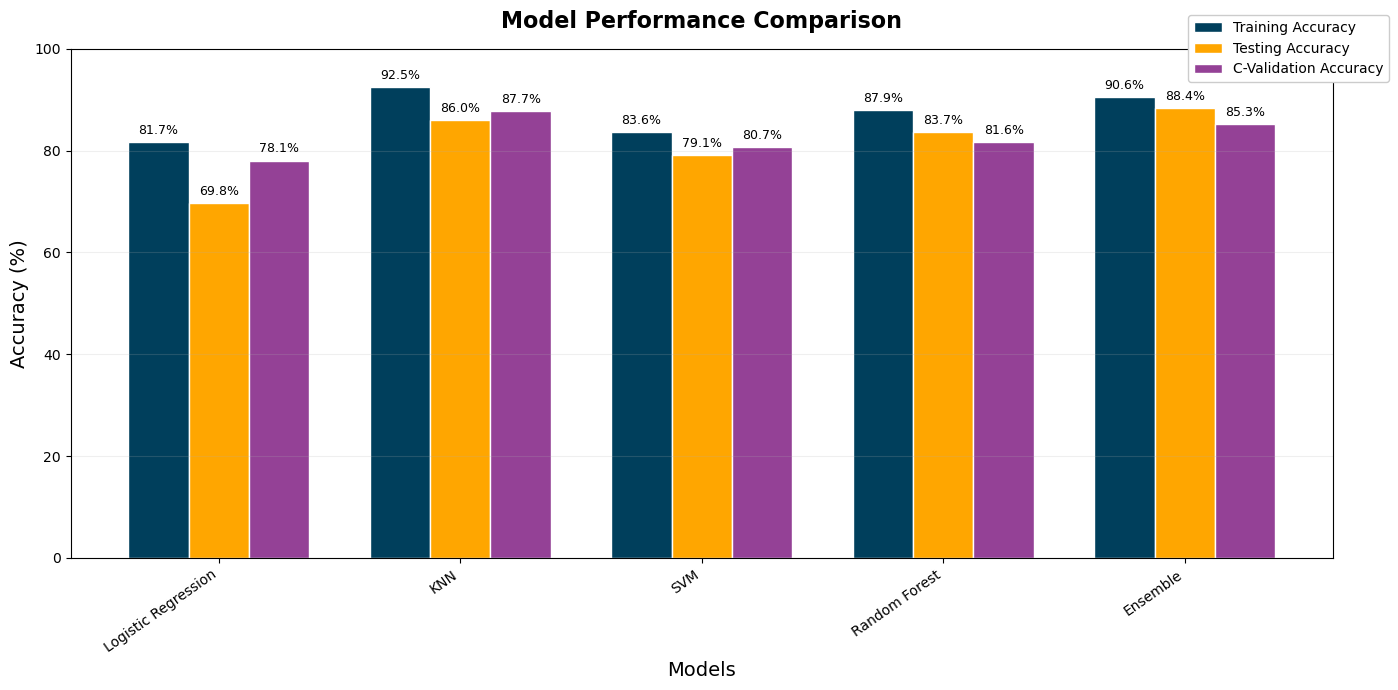

In [134]:
models = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Ensemble']
train_acc = [score * 100 for score in [logreg_train, knn_train, svm_train, rf_train, ens_train]]
test_acc = [score * 100 for score in [logreg_test, knn_test, svm_test, rf_test, ens_test]]
val_acc = [score * 100 for score in [cv_scores_lr.mean(), cv_scores_knn.mean(), cv_scores_svm.mean(), cv_scores_rf.mean(), cv_scores_ens.mean()]]    

plt.figure(figsize=(14, 7))
bar_width = 0.25
x = np.arange(len(models))

train_color = '#003f5c'  # Deep blue
test_color = '#ffa600'   # Gold
val_color = '#944196'    # Elegant purple

# Create bars
plt.bar(x - bar_width, train_acc, bar_width, label='Training Accuracy', color=train_color, edgecolor='white')
plt.bar(x, test_acc, bar_width, label='Testing Accuracy', color=test_color, edgecolor='white')
plt.bar(x + bar_width, val_acc, bar_width, label='C-Validation Accuracy', color=val_color, edgecolor='white')

# Formatting
plt.ylim(0, 100)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold',pad=15)
plt.xticks(x, models, rotation=35, ha='right')
plt.legend(framealpha=1, bbox_to_anchor=(1.05, 1.08), loc='upper right')

# Add percentage labels
for i in range(len(models)):
    plt.text(x[i] - bar_width, train_acc[i] + 1, f'{train_acc[i]:.1f}%', ha='center', va='bottom', fontsize=9)
    plt.text(x[i], test_acc[i] + 1, f'{test_acc[i]:.1f}%', ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + bar_width, val_acc[i] + 1, f'{val_acc[i]:.1f}%', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

---
# Modelling Summary

### The modelling phase compared a variety of classification algorithms for predicting glass types. Below is a summary of their test set accuracies:

- **Logistic Regression**: 70%
- **Random Forest**: 83.7%
- **SVM**: 79.1%
- **KNN**: 86%
- **Gradient Boosting**: 86%
- **XGBoost**: 81.3%
- **CatBoost**: 83.0% 
- **Naive Bayes**: 39.5%
- **AdaBoost**: 53.1%
- **Ensemble**: 88.4%
- **Deep Learning**: 60.4%

For the first look, the best overall performance came from the **KNN** model, achieving **86.0% test accuracy**.But An ensemble of SVM, Random Forest, and KNN outperformed KNN with **88.4% accuracy**, offering a balance between accuracy and diversity.

Boosting methods such as XGBoost and CatBoost demonstrated strong performance but showed tendencies to overfit. Simpler models like Naive Bayes and AdaBoost underperformed, likely due to unrealistic assumptions and high sensitivity to noise.

Deep learning underperformed due to limited dataset size, reinforcing that simpler models are often more effective for small tabular datasets.

---
# Model Selection
## We evaluated models based on:
- **Accuracy**: Testing and cross-validation accuracy to ensure generalization.
- **Robustness**: Stability across cross-validation folds (low standard deviation in scores).

### **Ensemble Model** was selected due to its high test accuracy (88.4%) and without overfitting, low variance in cross-validation (3.6%), and robust handling of categorical features. 

### GradBoost and KNN models were strong alternatives (86% & 86%) but won't be choosen due to slight overfitting in KNN and severe overfitting in CatBoost unlike the Ensemble model which is more robust and scalable with difference in test accuracy.